In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Model(nn.Module):
    # Input layer has 4 features of the flowers -> Hidden layer 1 --> Hidden layer 2 -> Output (3 classes of flower)

    def __init__(self, input_features=4, h1=8, h2=8, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:

# Create Model
model = Model()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df.head()

C:\Users\zship\AppData\Local\Temp\ipykernel_21012\1049013819.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
# Train test split. X is features, y is outcome (species)
X = my_df.drop('species', axis=1)
y = my_df['species']

In [13]:
X = X.values
y = y.values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [18]:
# Measure error
criterion = nn.CrossEntropyLoss()
# Adam optimizer and learning rate
optimizer = torch.torch.optim.Adam(model.parameters(), lr=0.01)


In [19]:
# Train the model
epochs = 100
losses = []
for i in range(epochs):
    # move forward and predict
    y_pred = model.forward(X_train)

    # measure loss
    loss = criterion(y_pred, y_train) # prediciton vs training data
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f"Epoch {i}: loss: {loss}")

    # back propogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0: loss: 1.1290984153747559
Epoch 10: loss: 0.9667229056358337
Epoch 20: loss: 0.6805912852287292
Epoch 30: loss: 0.40788745880126953
Epoch 40: loss: 0.24625691771507263
Epoch 50: loss: 0.14273571968078613
Epoch 60: loss: 0.09316318482160568
Epoch 70: loss: 0.07268240302801132
Epoch 80: loss: 0.06369306892156601
Epoch 90: loss: 0.059077318757772446


Text(0.5, 0, 'Epochs')

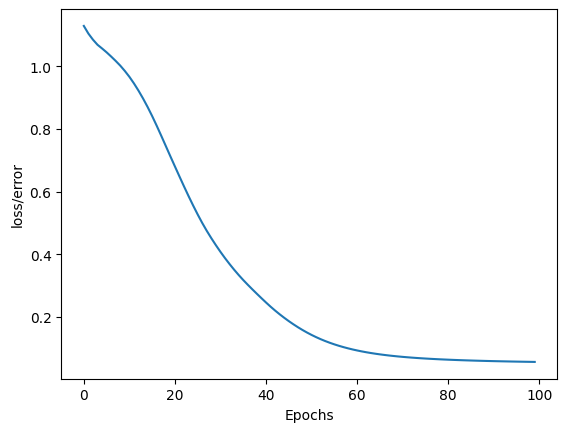

In [20]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

In [21]:
# validate model on test data
with torch.no_grad(): # no back propogation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test) # find loss

In [22]:
loss

tensor(0.0600)

In [26]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

        # is it correct
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f"Correct: {correct}")

1.) tensor([-10.2344,   1.0197,   8.8700]) 	 2 	 2
2.) tensor([-3.0270,  3.4145, -2.8327]) 	 1 	 1
3.) tensor([-3.8715,  3.8136, -2.4209]) 	 1 	 1
4.) tensor([  7.8503,   2.2609, -16.6844]) 	 0 	 0
5.) tensor([-7.2879,  2.4501,  3.5025]) 	 2 	 2
6.) tensor([-6.4982,  2.6227,  2.4580]) 	 1 	 1
7.) tensor([-11.0583,   1.4984,   8.9596]) 	 2 	 2
8.) tensor([-2.4863,  3.3808, -3.5645]) 	 1 	 1
9.) tensor([-6.6598,  2.5106,  2.7713]) 	 2 	 2
10.) tensor([-9.9037,  1.1217,  8.3512]) 	 2 	 2
11.) tensor([-1.2437,  2.9291, -4.4613]) 	 1 	 1
12.) tensor([-4.8274,  3.8826, -1.3191]) 	 1 	 1
13.) tensor([-11.6118,   1.0118,  10.2886]) 	 2 	 2
14.) tensor([-8.6010,  1.3130,  6.7194]) 	 2 	 2
15.) tensor([-10.1128,   1.2139,   8.4065]) 	 2 	 2
16.) tensor([-7.6776,  1.8290,  4.9703]) 	 2 	 2
17.) tensor([-3.0913,  3.3865, -2.6793]) 	 1 	 1
18.) tensor([-8.0601,  2.5198,  4.2479]) 	 2 	 2
19.) tensor([  7.0029,   2.1692, -15.1473]) 	 0 	 0
20.) tensor([  9.0682,   2.4032, -18.9979]) 	 0 	 0
21.) ten

In [27]:
# New data
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [28]:
with torch.no_grad():
    print(model(new_iris))

tensor([  8.5377,   2.2322, -17.8420])


In [30]:
# Save Model
torch.save(model.state_dict(), 'Iris-NN.pt')

In [31]:
# Load Model
new_model = Model()
new_model.load_state_dict(torch.load('Iris-NN.pt'))

<All keys matched successfully>

In [32]:
# Check the load
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)